## Preliminary exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

df = pd.read_csv(
    '../data/ground-truth/data.csv', 
    sep=";", 
    decimal=',', 
    low_memory=False,
    parse_dates=['LastPaymentDate', 'PenultimatePaymentDate', 'Date of Birth'], 
    dayfirst=True
)
df.columns = df.columns.str.replace(' ', '_').str.lower()


### Aggregate data

In [2]:
df['total_count'] = df[['count2015', 'count2016','count2017','count2018','count2019']].sum(axis=1)
df['total_sum'] = df[['sum2015', 'sum2016','sum2017','sum2018','sum2019']].sum(axis=1)
df['time_diff'] = (max(df['lastpaymentdate']) - df['lastpaymentdate']).dt.days
df['total_merch'] = df[['merchandise2015', 'merchandise2016', 'merchandiese2017', 'merchandiese2018', 'merchandise2019']].sum(axis = 1)

#### looking for outliers/distribution

Text(0.5, 1.0, 'recency')

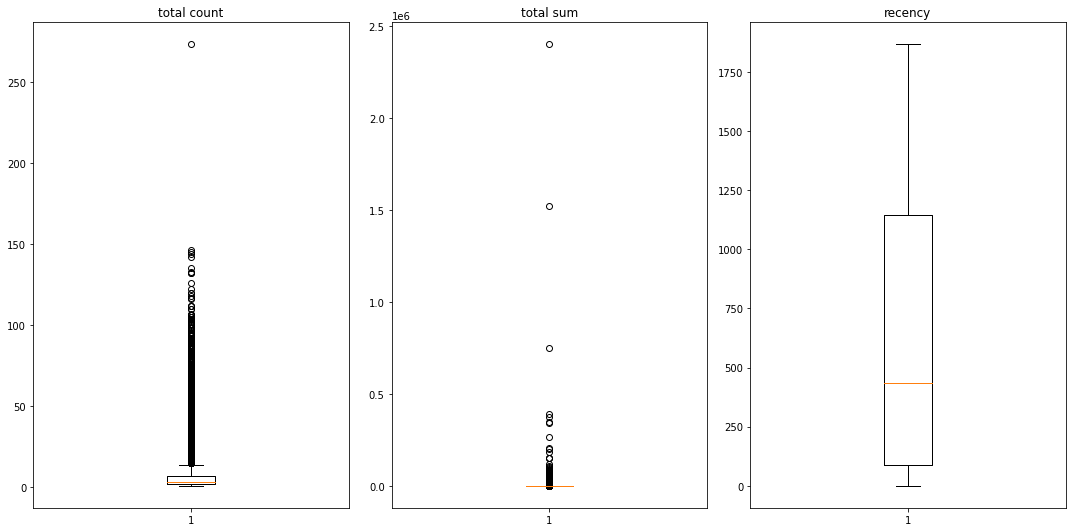

In [3]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [15, 7.5]
plt.rcParams["figure.autolayout"] = True


fig, axs = plt.subplots(1, 3)

axs[0].boxplot(df['total_count'])
axs[0].set_title('total count')


axs[1].boxplot(df['total_sum'])
axs[1].set_title('total sum')


axs[2].boxplot(df['time_diff'])
axs[2].set_title('recency')




<AxesSubplot:title={'center':'total count'}, ylabel='Frequency'>

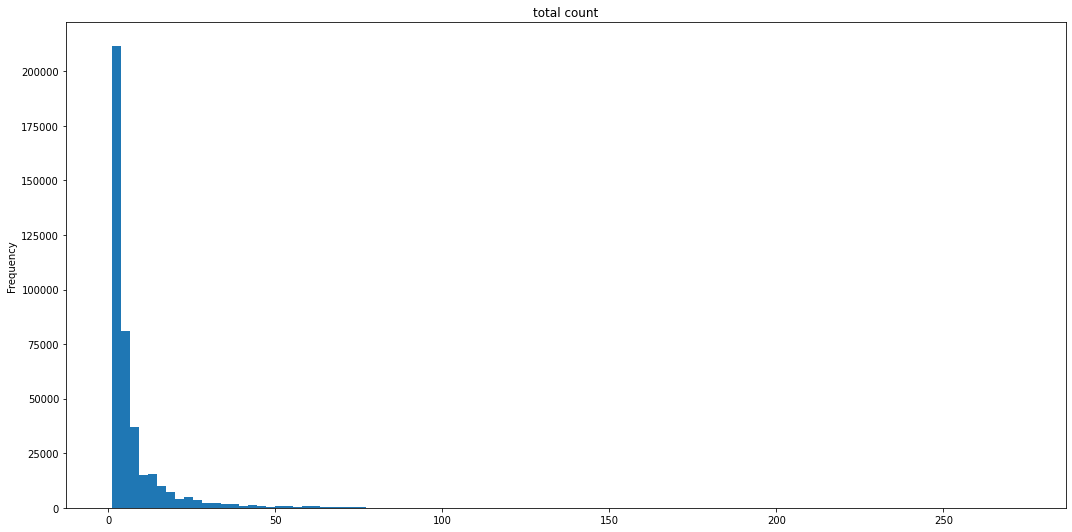

In [4]:
df['total_count'].plot(kind= 'hist', bins= 100, title= 'total count')

<AxesSubplot:title={'center':'Days since last payment'}, ylabel='Frequency'>

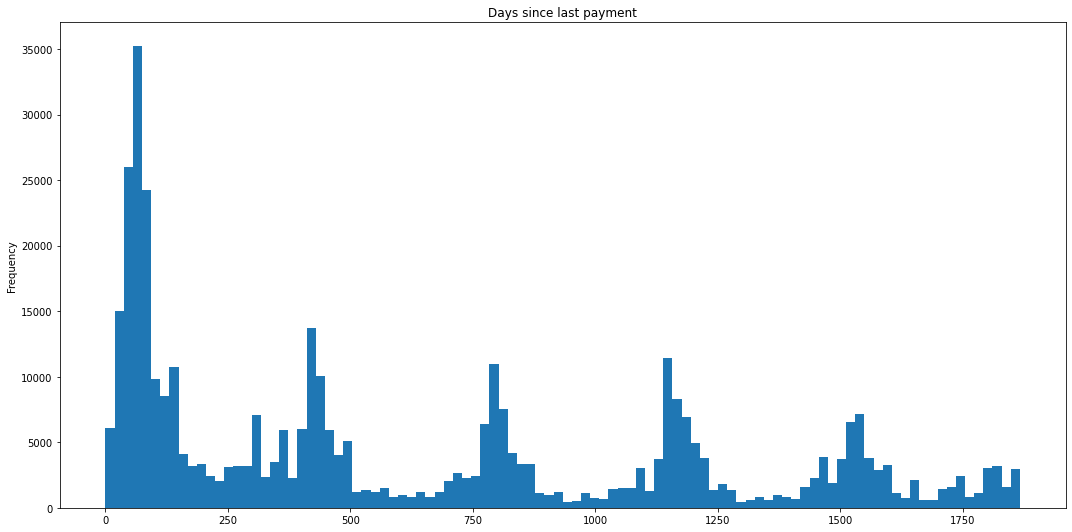

In [5]:
df['time_diff'].plot(kind = 'hist', bins = 100, title = 'Days since last payment')


There appears to be a pattern, which would need to be investigated. A higher "turnout" on certain days seems likely.

<AxesSubplot:title={'center':'total number of merch purchases'}, ylabel='Frequency'>

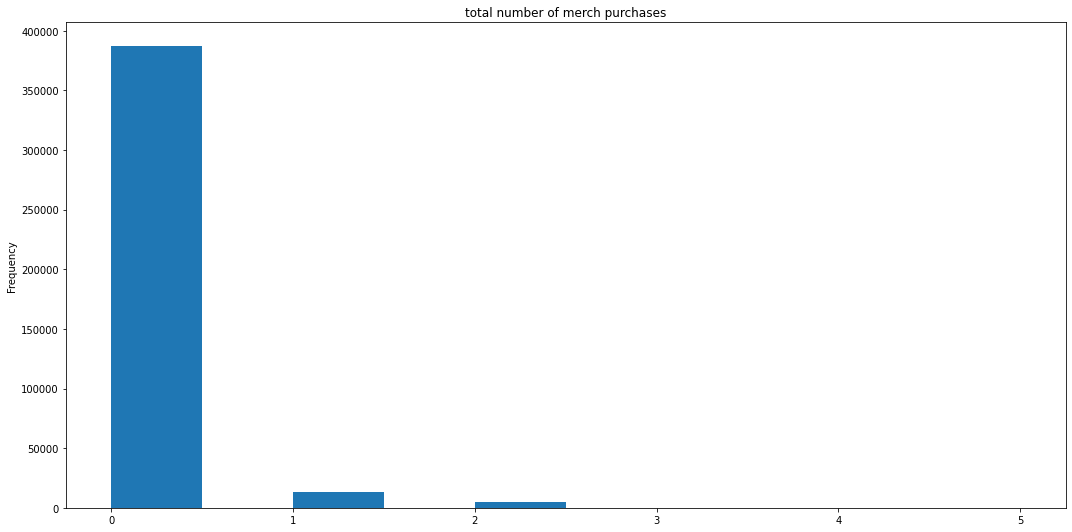

In [6]:
df['total_merch'].plot(kind= 'hist', title= 'total number of merch purchases')

<AxesSubplot:>

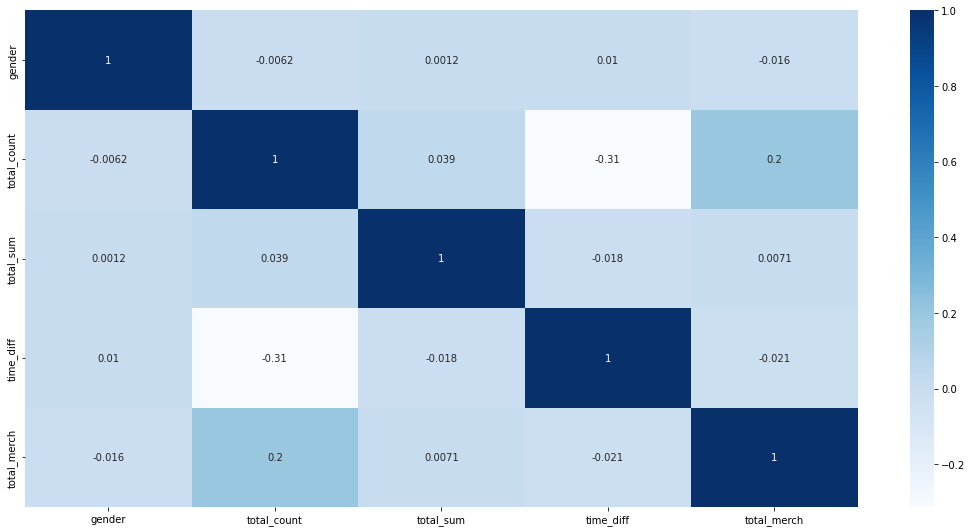

In [7]:
from seaborn import heatmap, pairplot, color_palette

minimal_df = df[['gender','total_count', 'total_sum', 'time_diff', 'total_merch', 'postcode']].copy()
minimal_df['gender'] = minimal_df['gender'].replace(['female', 'male', 'family'], [0, 1, 2])

heatmap(data = minimal_df.corr(), cmap= color_palette("Blues", as_cmap=True), annot= True)

The weakness of correlations is surprising; even with outliers in huge singular donations, a higher correlation between the total suma and total amount of donations was expected.

<AxesSubplot:xlabel='total_count', ylabel='total_sum'>

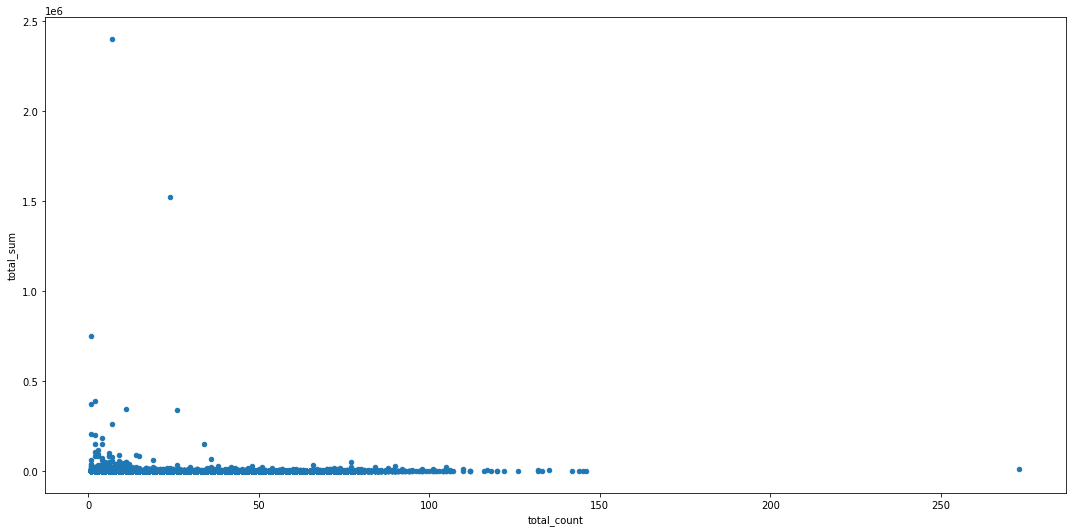

In [8]:
minimal_df.plot(kind= 'scatter', x= 'total_count', y= 'total_sum')

The maxima in count and sum seem suspicious.

In [9]:
most_frequent = minimal_df.loc[minimal_df['total_count'] == max(minimal_df['total_count'])]
print(f"One donor donated {max(minimal_df['total_count'])} times and contributed {round(float(most_frequent['total_sum']/most_frequent['total_count']), 2)} per donation on average. ")
biggest_donor = minimal_df.loc[minimal_df['total_sum'] == max(minimal_df['total_sum'])]
print(f"One donor contributed {max(minimal_df['total_sum'])} with {int(biggest_donor['total_count'])} donations averaging {round(float(biggest_donor['total_sum'] / biggest_donor['total_count']) ,2)}")

One donor donated 273 times and contributed 38.06 per donation on average. 
One donor contributed 2400225.0 with 7 donations averaging 342889.29


### more challenging data
#### Postcodes


In [10]:
postcodes = df['postcode'].dropna().values
problematic_postcodes = []
valid_postcodes = []
wrong_pc_donors = 0

for postcode in postcodes:
    if len(postcode) != 4:
        problematic_postcodes.append(postcode)
    else:
        valid_postcodes.append(postcode)
valid_postcodes = set(valid_postcodes)
        
for postcode in problematic_postcodes:
    wrong_pc_donors += len(df['postcode'].loc[(df['postcode'] == postcode)])


print(f"There is no postal code information for {(len(df)-len(df['postcode'].dropna())) / len(df):%} of donors")
print(f"At least {len(problematic_postcodes)} of the post codes are invalid.")
print(f"At least {wrong_pc_donors/len(df): %} have provided an invalid postal code.")


There is no postal code information for 2.256020% of donors
At least 740 of the post codes are invalid.
At least  0.264546% have provided an invalid postal code.


That does not seem like too shoddy a quality. Though postal code may contain too much information; the first two numbers (first indicating the state and second one the regiion) might be enough.

Text(0.5, 1.0, 'recency no postcode')

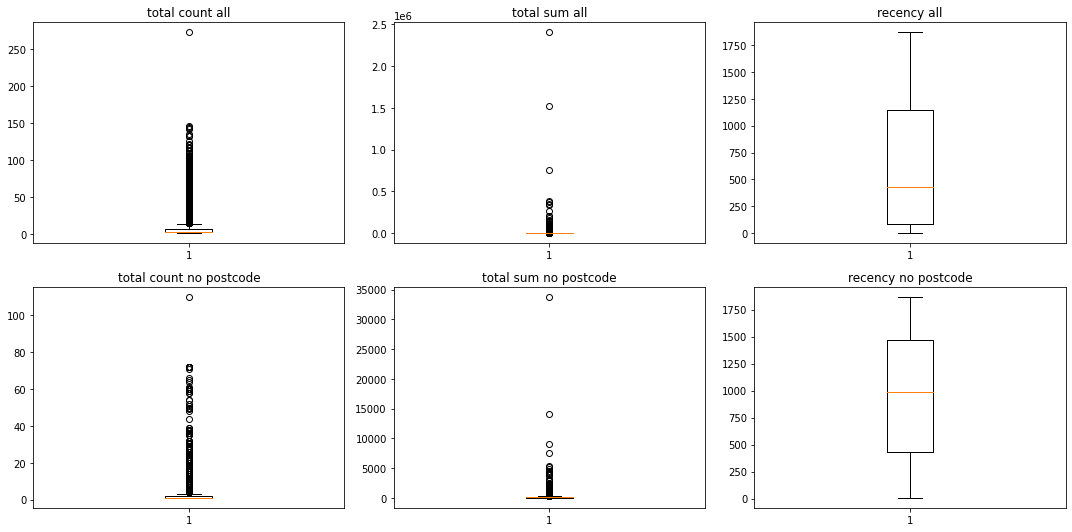

In [11]:
no_postcode = df[df['postcode'].isna()]

fig, axs = plt.subplots(2, 3)

axs[0, 0].boxplot(df['total_count'])
axs[0, 0].set_title('total count all')


axs[0, 1].boxplot(df['total_sum'])
axs[0, 1].set_title('total sum all')


axs[0, 2].boxplot(df['time_diff'])
axs[0, 2].set_title('recency all')



axs[1, 0].boxplot(no_postcode['total_count'])
axs[1, 0].set_title('total count no postcode')


axs[1, 1].boxplot(no_postcode['total_sum'])
axs[1, 1].set_title('total sum no postcode')


axs[1, 2].boxplot(no_postcode['time_diff'])
axs[1, 2].set_title('recency no postcode')



In [12]:
invalid_postcode = df.loc[df['postcode'].isin(problematic_postcodes)]

invalid_postcode

,customer_number,gender,date_of_birth,postcode,count2015,sum2015,merchandise2015,count2016,sum2016,merchandise2016,count2017,sum2017,merchandiese2017,count2018,sum2018,merchandiese2018,count2019,sum2019,merchandise2019,lastpaymentdate,penultimatepaymentdate,total_count,total_sum,time_diff,total_merch
2935,2936,female,NaT,02-657,0,0.0,0,0,0.0,0,0,0.0,0,0,0.00,0,1,1500.0,0,2019-04-12,NaT,1,1500.00,307,0
2941,2942,female,NaT,040 01,0,0.0,0,0,0.0,0,1,30.0,0,0,0.00,0,0,0.0,0,2017-12-28,NaT,1,30.00,777,0
3369,3370,female,NaT,10243,0,0.0,0,0,0.0,0,0,0.0,0,1,37.50,0,0,0.0,0,2018-08-09,NaT,1,37.50,553,0
4132,4133,female,NaT,10407,0,0.0,0,1,60.0,0,0,0.0,0,0,0.00,0,0,0.0,0,2016-09-08,NaT,1,60.00,1253,0
7555,7556,female,NaT,11559,0,0.0,0,0,0.0,0,0,0.0,0,1,22.50,0,0,0.0,0,2018-06-07,NaT,1,22.50,616,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403316,403317,male,1956-03-04,80339,0,0.0,0,0,0.0,0,2,200.0,0,1,75.00,0,0,0.0,0,2018-12-22,2017-12-19,3,275.00,418,0
405590,405591,male,1960-02-28,63500,0,0.0,0,0,0.0,0,0,0.0,0,0,0.00,0,1,10.5,0,2019-06-20,NaT,1,10.50,238,0
405707,405708,male,1960-05-10,70469,0,0.0,0,0,0.0,0,0,0.0,0,7,168.75,0,0,0.0,0,2018-07-26,2018-07-25,7,168.75,567,0
406026,406027,male,1960-12-20,80336,0,0.0,0,0,0.0,0,1,1500.0,0,1,225.00,0,0,0.0,0,2018-10-10,2017-04-20,2,1725.00,491,0


Those postcodes appear to be German. 

In [13]:
minimal_df['postcode'] = minimal_df['postcode'].replace(problematic_postcodes, 0)
for postcode in valid_postcodes:
    minimal_df['postcode'] = minimal_df['postcode'].replace(postcode, postcode[0])

minimal_df['postcode'] = minimal_df['postcode'].fillna(-9)

minimal_df = minimal_df.rename(columns = {'postcode': 'region'})

#### date of birth

In [14]:
print(f"There is no birthday information for {(len(df)-len(df['date_of_birth'].dropna())) / len(df):%} of donors")

There is no birthday information for 38.229162% of donors


## k-Means Experiment and comparison with rfc segmentation

Since we are relying on distance metric for clustering and distance becomes less and less meaningfully distinguishable in higher dimensional spaces, only the aggregated features will be considered initially. 



In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, max_iter=50 )
kmeans.fit(minimal_df)
cluster_labels = kmeans.labels_
minimal_df['cluster'] = cluster_labels

In [16]:
minimal_df['cluster'].value_counts()

0    239845
4    166722
7       139
5        20
2         5
3         1
6         1
1         1
Name: cluster, dtype: int64

The value counts here are distributed quite differently. The eight clusters generated do not seem to correspond as those from the frc preprocessing.

In [17]:
inertias = []
range_n_clusters = list(range(2,10))

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters= num_clusters, max_iter = 50)
    kmeans.fit(minimal_df.drop('cluster', axis=1))

    inertias.append(kmeans.inertia_)

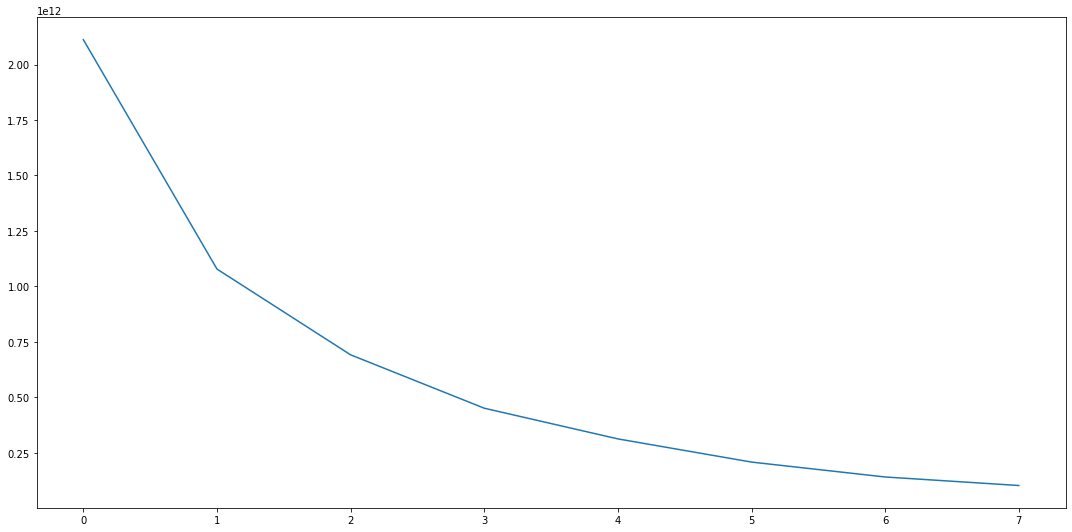

In [18]:
plt.plot(inertias)

In [19]:
kmeans = KMeans(n_clusters= 3, max_iter = 50)
kmeans.fit(minimal_df.drop('cluster', axis=1))

cluster_labels = kmeans.labels_

minimal_df['cluster'] = cluster_labels

In [20]:
minimal_df['cluster'].value_counts()

0    406723
2         9
1         2
Name: cluster, dtype: int64

Not a very useful clustering.

Let's see if it can be improved.

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
min_df_scaled = scaler.fit_transform(minimal_df.drop('cluster', axis=1))
min_df_scaled = pd.DataFrame(min_df_scaled) 
min_df_scaled.columns = minimal_df.drop('cluster', axis=1).columns

In [22]:
kmeans = KMeans(n_clusters= 8, max_iter = 50)
kmeans.fit(min_df_scaled)


KMeans(max_iter=50)

In [23]:
min_df_scaled['cluster'] = kmeans.labels_

In [24]:
min_df_scaled['cluster'].value_counts()

0    104357
7    104100
4     76036
6     74333
2     20070
5     18714
1      9122
3         2
Name: cluster, dtype: int64

In [25]:
rfc_clusters = pd.read_csv('../data/ground-truth/segmented.csv') 

In [26]:
min_df_scaled['rfc_cluster'] = rfc_clusters['customer_segment']
min_df_scaled.groupby('rfc_cluster')['cluster'].value_counts()

rfc_cluster          cluster
Champions            0           9477
                     7           9095
                     6           6601
                     4           6508
                     2           1755
                     5           1682
                     1            631
Hibernating          0          16851
                     7          16804
                     4          12180
                     6          11931
                     2           3306
                     5           3025
                     1           1469
Lost                 7          41484
                     0          40887
                     4          30424
                     6          29656
                     2           7991
                     5           7325
                     1           3889
                     3              2
Lost Champions       7            877
                     0            853
                     4            645
                     

In [27]:
kmeans = KMeans(n_clusters= 8, max_iter = 50)
kmeans.fit(min_df_scaled.drop(['region', 'cluster', 'rfc_cluster'], axis = 1))

min_df_scaled['cluster'] = kmeans.labels_

In [28]:
min_df_scaled.groupby('rfc_cluster')['cluster'].value_counts()

rfc_cluster          cluster
Champions            1           9620
                     0           9186
                     2           6839
                     3           6671
                     6           1753
                     5           1147
                     7            533
Hibernating          1          17148
                     0          17060
                     3          12593
                     2          12447
                     6           3302
                     5           2097
                     7            919
Lost                 0          42074
                     1          41648
                     3          31465
                     2          31155
                     6           8015
                     5           5238
                     7           2061
                     4              2
Lost Champions       0            887
                     1            875
                     3            660
                     

Apparently the information loss of the aggregates is in the way. Let's try some more features.


In [32]:
df['postcode'] = df['postcode'].replace(problematic_postcodes, 0)
for postcode in valid_postcodes:
    df['postcode'] = df['postcode'].replace(postcode, postcode[0])

df['postcode'] = df['postcode'].fillna(-9)

df = df.rename(columns = {'postcode': 'region'})

In [37]:
df

,customer_number,gender,date_of_birth,region,count2015,sum2015,merchandise2015,count2016,sum2016,merchandise2016,count2017,sum2017,merchandiese2017,count2018,sum2018,merchandiese2018,count2019,sum2019,merchandise2019,lastpaymentdate,penultimatepaymentdate,total_count,total_sum,time_diff,total_merch
0,1,female,NaT,-9,0,0.0,0,0,0.0,0,0,0.0,0,0,0.00,0,1,4.50,0,2019-12-18,NaT,1,4.50,57,0
1,2,female,NaT,-9,0,0.0,0,0,0.0,0,0,0.0,0,0,0.00,0,1,1.53,0,2019-12-28,NaT,1,1.53,47,0
2,3,female,NaT,-9,0,0.0,0,0,0.0,0,0,0.0,0,0,0.00,0,1,3.00,0,2019-12-05,NaT,1,3.00,70,0
3,4,female,NaT,-9,0,0.0,0,0,0.0,0,0,0.0,0,0,0.00,0,1,4.50,0,2019-06-04,NaT,1,4.50,254,0
4,5,female,NaT,-9,0,0.0,0,0,0.0,0,0,0.0,0,0,0.00,0,1,4.95,0,2019-03-30,NaT,1,4.95,320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406729,406730,male,1962-04-18,6,2,30.0,0,0,0.0,0,0,0.0,0,1,15.00,0,1,45.00,0,2019-12-14,2018-09-27,4,90.00,61,0
406730,406731,male,1962-04-19,2,2,15.0,0,1,20.0,0,0,0.0,0,1,15.00,0,2,52.50,0,2019-11-23,2019-09-27,6,102.50,82,0
406731,406732,male,1962-04-19,3,0,0.0,0,0,0.0,0,0,0.0,0,0,0.00,0,1,75.00,0,2019-12-18,2006-05-03,1,75.00,57,0
406732,406733,male,1962-04-19,6,2,22.5,0,1,30.0,0,0,0.0,0,1,11.25,0,0,0.00,0,2018-11-28,2016-11-14,4,63.75,442,0


<AxesSubplot:>

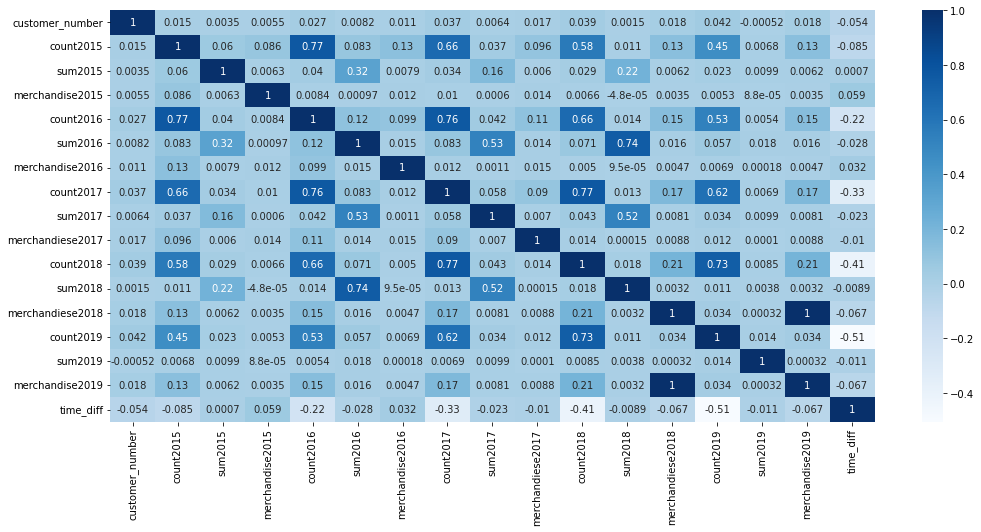

In [52]:
feature_df = df.drop(['date_of_birth', 'total_count', 'total_sum', 'penultimatepaymentdate', 'lastpaymentdate', 'total_merch', 'date_of_birth' ], axis = 1)
heatmap(data = feature_df.corr(), cmap= color_palette("Blues", as_cmap=True), annot= True)

Apparently only one feature  can be disregarded. Still, better than nothing. 

In [56]:
feature_df = feature_df.drop('merchandise2019', axis = 1)
feature_df['gender'] = feature_df['gender'].replace(['female', 'male', 'family'], [0, 1, 2])
feature_df = feature_df.drop('customer_number', axis = 1)

In [57]:
scaler = StandardScaler()
feature_df_scaled = scaler.fit_transform(feature_df)
feature_df_scaled = pd.DataFrame(feature_df_scaled) 
feature_df_scaled.columns = feature_df.columns

In [58]:
kmeans = KMeans(n_clusters= 8, max_iter = 50)
kmeans.fit(feature_df_scaled)

KMeans(max_iter=50)

In [63]:
feature_df_scaled['cluster'] = kmeans.labels_
feature_df_scaled['rfc_cluster'] = rfc_clusters['customer_segment']
feature_df_scaled.groupby('rfc_cluster')['cluster'].value_counts()

rfc_cluster          cluster
Champions            1          16497
                     6          15972
                     2           2456
                     0            443
                     5            381
Hibernating          6          29987
                     1          29696
                     2           4474
                     0            730
                     5            678
                     7              1
Lost                 6          74089
                     1          72985
                     2          10975
                     0           1865
                     5           1742
                     3              1
                     4              1
Lost Champions       6           1555
                     1           1498
                     2            209
                     0             37
                     5             36
Loyal Customers      6          41301
                     1          41005
                     

Not too promising either.

### Agglomerative Clustering experiment

In [90]:
feature_df_scaled = feature_df_scaled.drop('cluster', axis = 1)
heirarchy_experi = feature_df_scaled.head(500)

In [91]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=8, affinity='manhattan', linkage= 'complete')
agglo.fit_predict(heirarchy_experi.drop('rfc_cluster', axis = 1))

heirarchy_experi['cluster'] = agglo.labels_

C:\Users\1CA4~1\AppData\Local\Temp/ipykernel_66932/1849948270.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heirarchy_experi['cluster'] = agglo.labels_


In [93]:
heirarchy_experi.groupby('cluster')['rfc_cluster'].value_counts()

cluster  rfc_cluster        
0        Lost                    17
         Loyal Customers         11
         Promising                7
         Hibernating              3
         New Customers            3
         Champions                2
1        Loyal Customers          2
         Hibernating              1
2        Lost                    52
         Loyal Customers         39
         Hibernating             27
         Promising               12
         Champions                7
         New Customers            7
         Lost Champions           1
         Potential Loyalists      1
3        Promising                1
4        Loyal Customers          1
5        Hibernating              4
         Lost                     3
         Loyal Customers          3
         New Customers            1
         Promising                1
6        Lost                   116
         Hibernating             60
         Loyal Customers         57
         Promising               24